Name: Abdurrahim Gün

ID: 191201003

Course: YAP470 / BIL470

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmeans import KMeansClusterClassifier
from sklearn.model_selection import train_test_split

### Load Dataset

In [2]:
data = pd.read_csv('Iris.csv')
data = data.drop(columns=['SepalWidthCm', 'Id'], axis=1)

In [3]:
data.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,1.4,0.2,Iris-setosa
1,4.9,1.4,0.2,Iris-setosa
2,4.7,1.3,0.2,Iris-setosa
3,4.6,1.5,0.2,Iris-setosa
4,5.0,1.4,0.2,Iris-setosa


### 3D Plot of Dataset

In [4]:
class1_data = data[data['Species'] == 'Iris-setosa']
class2_data = data[data['Species'] == 'Iris-virginica']
class3_data = data[data['Species'] == 'Iris-versicolor']

C:\Users\abdur\AppData\Local\Temp\ipykernel_28656\3463302235.py:6: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


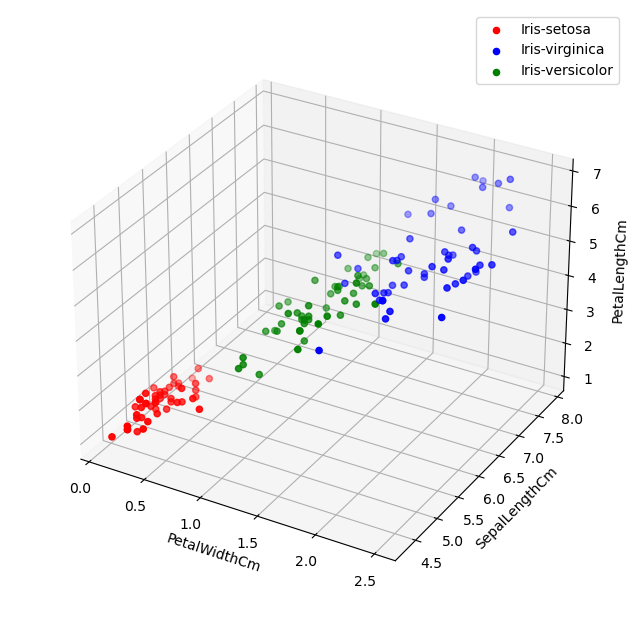

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class1_data['PetalWidthCm'], class1_data['SepalLengthCm'], class1_data['PetalLengthCm'], color='red', label='Iris-setosa')
ax.scatter(class2_data['PetalWidthCm'], class2_data['SepalLengthCm'], class2_data['PetalLengthCm'], color='blue', label='Iris-virginica')
ax.scatter(class3_data['PetalWidthCm'], class3_data['SepalLengthCm'], class3_data['PetalLengthCm'], color='green', label='Iris-versicolor')
ax.dist = 11
ax.set_xlabel('PetalWidthCm')
ax.set_ylabel('SepalLengthCm')
ax.set_zlabel('PetalLengthCm')
plt.legend()
plt.show()

### Split Dataset

In [6]:
new_names = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['Species'] = data['Species'].map(new_names)
x = data.values.tolist()
y = []
for row in x:
    y.append(int(row[3]))
    del row[3]

x = pd.Series(x)
y = pd.Series(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

x_train_list = x_train.values.tolist()
x_test_list = x_test.values.tolist()
y_train_list = y_train.values.tolist()
y_test_list = y_test.values.tolist()

### Plotting the Elbow Curve

In [7]:
inertias = []

for n in range(1, 10):
    kmeans = KMeansClusterClassifier(n_clusters=n)
    kmeans.fit(x_train_list, y_train_list)
    inertia = kmeans.calculate_inertia()
    inertias.append(inertia)


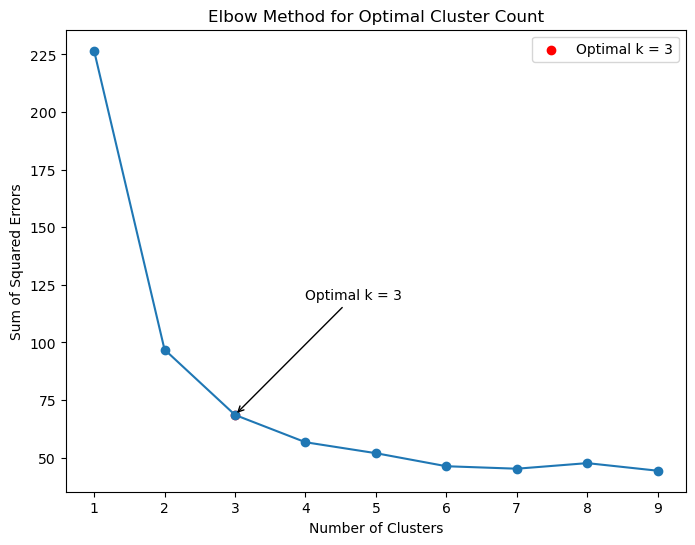

In [8]:
from kneed import KneeLocator

kneedle = KneeLocator(range(1, len(inertias) + 1), inertias, curve='convex', direction='decreasing')
best_cluster = kneedle.elbow

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertias, marker='o')
plt.title('Elbow Method for Optimal Cluster Count')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')

plt.scatter(best_cluster, inertias[best_cluster - 1], color='red', label=f'Optimal k = {best_cluster}')
plt.annotate(f'Optimal k = {best_cluster}', xy=(best_cluster, inertias[best_cluster - 1]), xytext=(best_cluster + 1, inertias[best_cluster - 1] + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()

plt.show()

### Train Model

In [9]:
kmeans = KMeansClusterClassifier(n_clusters=3)

In [10]:
kmeans.fit(x_train_list, y_train_list)

In [11]:
predictions = kmeans.predict(x_test_list)

### Plot Confusion Matrix

In [12]:
def confusion_matrix(yTrue, yPred):
    classes = list(set(yTrue + yPred))
    numberOfClasses = len(classes)
    
    cm = [[0] * numberOfClasses for _ in range(numberOfClasses)]
    
    for i in range(len(yTrue)):
        trueClass = classes.index(yTrue[i])
        predClass = classes.index(yPred[i])
        cm[trueClass][predClass] += 1
        
    return cm, classes

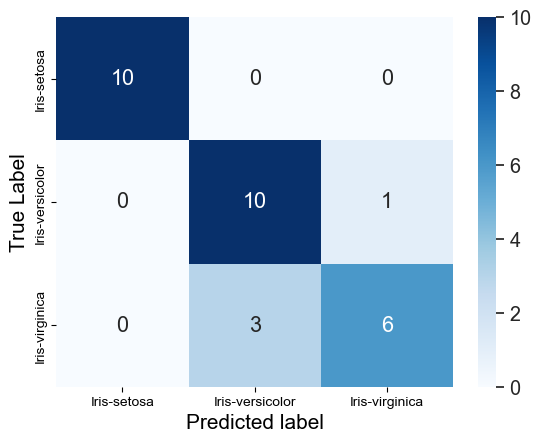

<Figure size 1000x700 with 0 Axes>

In [13]:
import seaborn as sns

cm, classes = confusion_matrix(y_test_list, predictions)

dfTest = pd.DataFrame(cm, index=classes, columns=classes)
dfTest.columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
dfTest.index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(dfTest, annot=True, fmt="g", ax=ax, cmap="Blues")

ax.set_xlabel("Predicted label", fontsize =15)

ax.set_ylabel("True Label", fontsize=15)

plt.show()

### Evaluation Metrics

In [14]:
def metrics(confusionMatrix):
    truePositives = confusionMatrix.values.diagonal()
    falsePositives = confusionMatrix.sum(axis=0) - truePositives
    falseNegatives = confusionMatrix.sum(axis=1) - truePositives
    totalSamples = confusionMatrix.values.sum()
    
    precision = truePositives / (truePositives + falsePositives)
    recall = truePositives / (truePositives + falseNegatives)
    f1Score = 2 * (precision * recall) / (precision + recall)
    accuracy =truePositives.sum() / totalSamples
    
    return f1Score, accuracy, precision, recall

In [15]:
f1Score, accuracy, precision, recall = metrics(dfTest)
f1Score

Iris-setosa        1.000000
Iris-versicolor    0.833333
Iris-virginica     0.750000
dtype: float64

In [16]:
accuracy

0.8666666666666667

In [17]:
precision

Iris-setosa        1.000000
Iris-versicolor    0.769231
Iris-virginica     0.857143
dtype: float64

In [18]:
recall

Iris-setosa        1.000000
Iris-versicolor    0.909091
Iris-virginica     0.666667
dtype: float64

### Plotting ROC Curve

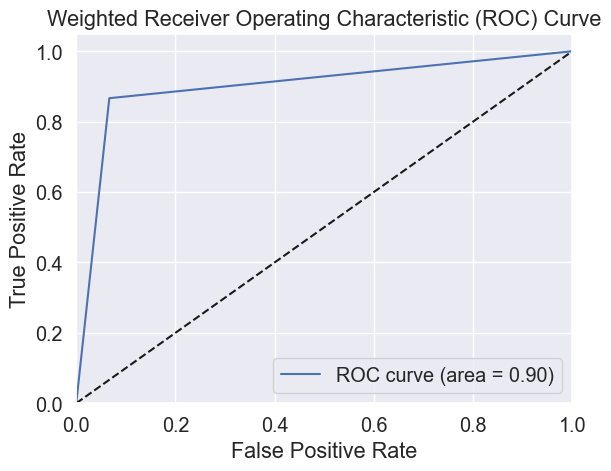

In [19]:
from sklearn.metrics import roc_curve, auc

y_original = np.array([[int(x == i) for x in y_test_list] for i in range(3)])
y_result = np.array([[int(x == i) for x in predictions] for i in range(3)])

average = 'weighted'

fpr, tpr, _ = roc_curve(y_result.ravel(), y_original.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr,
         label='ROC curve (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weighted Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Results

KMeans model is actually an unsupervised clustering model. However, in this assignment, after clustering the data, labels were assigned to the clusters by majority voting on the labels of the data in each cluster. The accuracy of the KMeans model written in this assignment was found to be approximately 86.67%. The accuracy value of the decision tree model written in the first assignment was found to be approximately 96.67%. The accuracy value of the KMeans model is more variable than the decision tree. This is because in the KMeans model, the cluster centres are initially selected randomly, so there is a possibility of different clusters in different trainings. 